Here's an extensive summary in markdown format, drawing on the provided sources, our conversation history, and with some bolding to highlight key concepts:

**Retrievers**

*   **Overview:** Retrievers are a key component in AI applications, especially with the rise of large language models (LLMs) and Retrieval Augmented Generation (RAG). They provide a **unified interface for interacting with different types of retrieval systems**.

*   **Purpose**: Retrievers are designed to take a query (string) as input and return a list of relevant documents. They form a crucial part of AI systems that require access to external knowledge sources.

*   **Interface:**
    *   All retrievers implement a simple interface for retrieving documents using natural language queries.
    *   The core requirement is the implementation of the `_get_relevant_documents` method, which accepts a query (string) and returns a list of `Document` objects.
    *   The underlying logic for retrieving documents is specific to the retriever and can be tailored to the application's needs.
    *   A LangChain retriever is also a runnable, meaning it has methods like `invoke` for interaction.
    *   `invoke` is used to call the retriever with a query: `docs = retriever.invoke(query)`.
*   **Document Objects:** Retrievers return a list of `Document` objects, each containing:
    *   `page_content`: The content of the document (a string).
    *   `metadata`: Arbitrary metadata associated with the document (e.g., document ID, file name, source).

*   **Common Types of Retrievers**:

    *   **Search APIs:** Retrievers can be built on top of search APIs, which directly return search results. This means that **retrievers don't necessarily need to store documents**. Examples include integrations with Amazon Kendra and Wikipedia Search.

    *   **Relational or Graph Databases**: Retrievers can be built on top of relational or graph databases. Query analysis techniques that transform natural language into structured queries (e.g., text-to-SQL or text-to-Cypher) are often crucial in this context.

        *   For example, a natural language query (string) can be transformed into a SQL query behind the scenes.

    *   **Lexical Search**: Many search engines are based on matching words in a query to the words in each document. Popular lexical search algorithms include BM25 and TF-IDF. LangChain provides integrations for many such algorithms.
    *    **Vector Store**: Vector stores are powerful and efficient methods for indexing and retrieving unstructured data. A vector store can be used as a retriever by calling the `as_retriever()` method.
    ```python
        vectorstore = MyVectorStore()
        retriever = vectorstore.as_retriever()
    ```
    *   **These common types of retrievers relate directly to the information in the prior conversation about Vector Stores, Embedding Models and Text Splitters. Vector stores use embeddings to represent the meaning of documents and queries and text splitters to make long documents easier to index and search.**

*   **Advanced Retrieval Patterns**
    *   **Ensemble**: Multiple retrievers can be combined using ensembling. This is helpful when different retrievers are good at finding different types of relevant documents. An ensemble retriever combines multiple retrievers with weighted scores.
    ```python
        ensemble_retriever = EnsembleRetriever(
            retrievers = [bm25_retriever, vector_store_retriever],
            weights = [0.5, 0.5]
        )
    ```
    *   **Re-ranking**: Re-ranking involves taking the output of multiple retrievers and combining them using more sophisticated algorithms, such as Reciprocal Rank Fusion (RRF).
    *  **Source Document Retention**:
        *   Many retrievers use an index, and indexing often involves a transformation step (e.g., document splitting in vector stores). It is useful to maintain a link between the transformed document and the original document.
        *  This helps in AI applications by ensuring no loss of document context for the model. For example, if only chunks are returned from a vector store retrieval, the model may lose the original document context.
        *   **Multi-Vector Retriever**: Allows users to use any document transformation (e.g., using an LLM to create a summary) for indexing while keeping a link to the source document.
        *  **ParentDocument Retriever**: Links document chunks from a text-splitter transformation for indexing, while keeping a link to the source document. This involves indexing multiple chunks for each document, but retrieving the entire parent document.

     *   These advanced retrieval methods build directly on the prior discussion on vector stores, text splitters, and embedding models, demonstrating the practical applications of these concepts.
      *   The source document retention methods are also directly relevant to document loading from previous conversation as these methods provide a means of retrieving whole documents from a set of transformed and indexed chunks.

*   **Key Takeaways:**

    *   Retrievers provide a simple yet flexible interface for retrieving documents based on natural language queries.
    *   They are a vital part of many AI systems.
    *   LangChain provides implementations and integrations for a variety of different retrieval systems.
    *   Advanced techniques like ensembling and source document retention address specific challenges to enhance retrieval.

This summary draws on the provided source material and prior conversation, providing a comprehensive overview of retrievers and their relationship to other concepts.

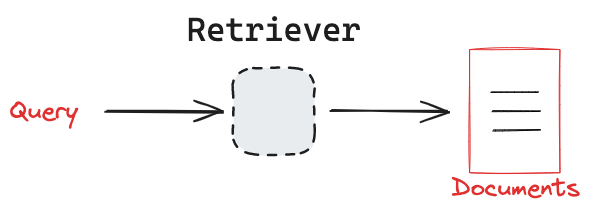
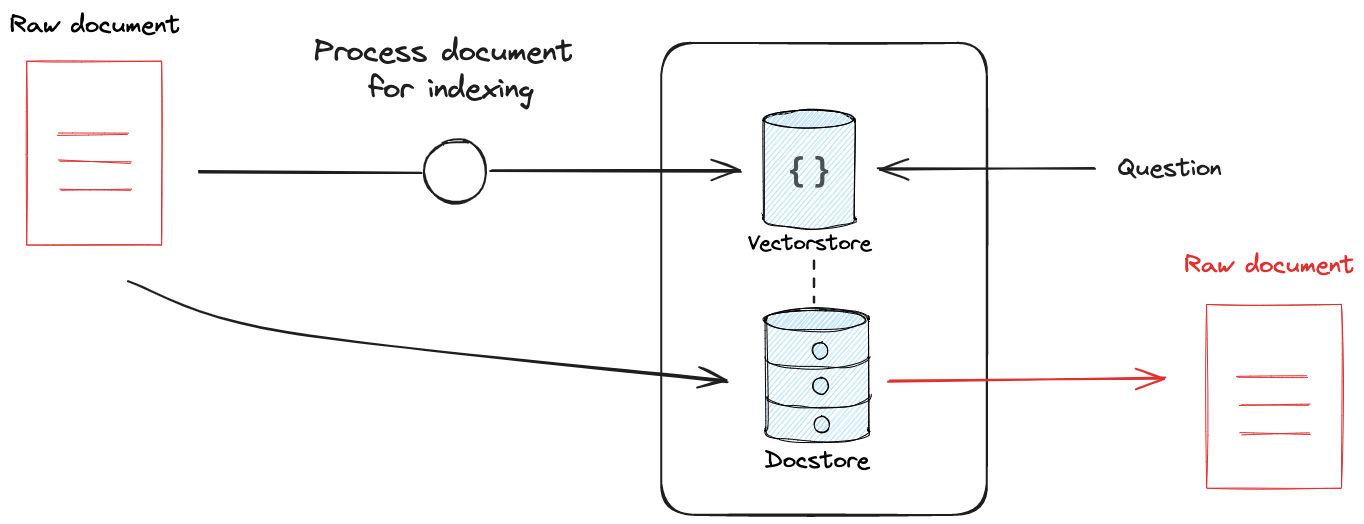